In [1]:
# set up
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Zadanie 1.

### 1.1 
Utwórz zestaw danych X składający się z 1000 wektorów dwuwymiarowych xi = (x1i,x2i).T, </br>
dla i = 1, 2, …, 1000, wygenerowanych losowo przy użyciu dwuwymiarowego </br>
rozkładu normalnego o średniej [3, 5] i macierzy kowariancji [12, 3; 3, 1]. </br>

In [2]:
mu = [3, 5]
sigma = [[12, 3], 
         [3, 1]]

X = np.random.multivariate_normal(mu, sigma, 1000)

### 1.2
Ustandaryzuj dane, tak aby średnia dla każdego z wymiarów wynosiła 0, a wariancja 1.

In [3]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

In [4]:
X_std.std(axis=0), X_std.mean(axis=0)

(array([1., 1.]), array([ 3.01536573e-16, -8.73223716e-15]))

### 1.3
Policz macierz kowariancji S ustandaryzowanego zestawu danych X_std

In [5]:
print(np.cov(X.T))
print()
sigma_std = np.cov(X_std.T)
print(sigma_std)

[[11.3805824   2.80963763]
 [ 2.80963763  0.95283423]]

[[1.001001   0.85407086]
 [0.85407086 1.001001  ]]


In [6]:
def COV(X, Y):
    return np.sum((X - X.mean()) * (Y - Y.mean())) / len(X)

In [7]:
COV_X_Y = COV(X_std[:, 0], X_std[:, 1])
COV_X_X = COV(X_std[:, 0], X_std[:, 0])
COV_Y_Y = COV(X_std[:, 1], X_std[:, 1])
print('X_std matrix:')
print(COV_X_Y)
print(COV_X_X)
print(COV_Y_Y)

X_std matrix:
0.8532167879782071
1.0000000000000002
0.9999999999999987


In [8]:
print('X matrix:')
print(COV(X[:, 0], X[:, 1]))
print(COV(X[:, 0], X[:, 0]))
print(COV(X[:, 1], X[:, 1]))

X matrix:
2.8068279959732068
11.36920181883984
0.9518813968288521


### 1.4
Wyznacz wartości własne λ1 i λ2 oraz odpowiadające im wektory własne v1 i v2 <br>
macierzy kowariancji S. Dla ustalenia notacji, wartości własne porządkujemy malejąco, <br>
tzn. λ1 > λ2. <br>
<br>
\begin{equation*} A \vec{v} = \lambda \vec{v} \end{equation*}
<br>
\begin{eqnarray*} A \vec{v} - \lambda \vec{v} = 0 \\  \Rightarrow \vec{v} (A - \lambda I) = 0, \end{eqnarray*}
<br>
\begin{equation*}  Det(A - \lambda I) = 0. \end{equation*}
<br>
\begin{equation*} Det\begin{pmatrix}cov(X, X)-\lambda&cov(X, Y)\\cov(X, Y)&cov(Y, Y)-\lambda\end{pmatrix}=0. \end{equation*}
<br>
\begin{equation*} \begin{bmatrix}cov(X, X)&cov(X, Y)\\cov(X, Y)&cov(Y, Y)\end{bmatrix} \begin{bmatrix}x_{11}\\x_{12}\end{bmatrix} = \lambda \begin{bmatrix}x_{11}\\x_{12}\end{bmatrix}\end{equation*}

In [9]:
# calculate eigenvalues
delta = (COV_X_X + COV_Y_Y) ** 2 - 4 * (COV_X_X * COV_Y_Y - COV_X_Y * COV_X_Y)
lambda_1 = ((COV_X_X + COV_Y_Y) - np.sqrt(delta)) / 2
lambda_2 = ((COV_X_X + COV_Y_Y) + np.sqrt(delta)) / 2

print(f'λ1: {lambda_1}, λ2: {lambda_2}')

λ1: 0.14678321202179234, λ2: 1.8532167879782064


In [10]:
# calculate eigenvectors
(COV_X_X + lambda_1) * (COV_Y_Y + lambda_1) - COV_X_Y ** 2

0.5871328480871691

In [11]:
v, w = LA.eig(sigma_std)
print(f'Eigenvectors:\n{w},\n\nEigenvalues: {v}')

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]],

Eigenvalues: [1.85507186 0.14693014]


In [12]:
print(f'Eigenvector V1:\n{np.array([-1, 1])[:, np.newaxis]}')
print(f'Eigenvector V2:\n{np.array([1, 1])[:, np.newaxis]}')

Eigenvector V1:
[[-1]
 [ 1]]
Eigenvector V2:
[[1]
 [1]]


### 1.5
Wyznacz składowe główne zestawu danych, tzn. dla każdego punktu danych xi(0)  <br>
wyznacz punkt yi = (1/sqrt(λ1) v1.T xi(0), 1/sqrt(λ2) v2.T xi(0)).T.  <br>
Odpowiada to zrzutowaniu punktu xi (0) na osie nowego układu współrzędnych <br>
wyznaczonego przez wektory własne macierzy S i przeskalowaniu  <br>
przez pierwiastki z wartości własnych. <br>


In [13]:
# maaaaaaagic ???
X_pc = np.dot(X_std, np.dot(w, np.diag(1 / np.sqrt(v))))

### 1.6
Zrób rysunki pokazujące oryginalny zbiór danych (punkty xi), zbiór danych po standaryzacji <br>
(punkty xi (0)) i zbioru danych po przekształceniu PCA (punkty yi). <br>
Na rysunkach z punktami xi i xi (0) narysuj proste zawierające osie główne elipsy <br>
wyznaczanej przez punkty danych. <br>

In [19]:
a = X.mean(axis=0)[0] - mu[1] * w[0][0] * X.std(axis=0)[0]
b = X.mean(axis=0)[0] + mu[1] * w[0][0] * X.std(axis=0)[0]

c = X.mean(axis=0)[1] - mu[1] * w[0][1] * X.std(axis=0)[1]
d = X.mean(axis=0)[1] + mu[1] * w[0][1] * X.std(axis=0)[1]


e = X.mean(axis=0)[0] - mu[1] * w[1][0] * X.std(axis=0)[0]
f = X.mean(axis=0)[0] + mu[1] * w[1][0] * X.std(axis=0)[0]

g = X.mean(axis=0)[1] - mu[1] * w[1][1] * X.std(axis=0)[1]
h = X.mean(axis=0)[1] + mu[1] * w[1][1] * X.std(axis=0)[1]

Text(0.5, 1.0, 'X standarized')

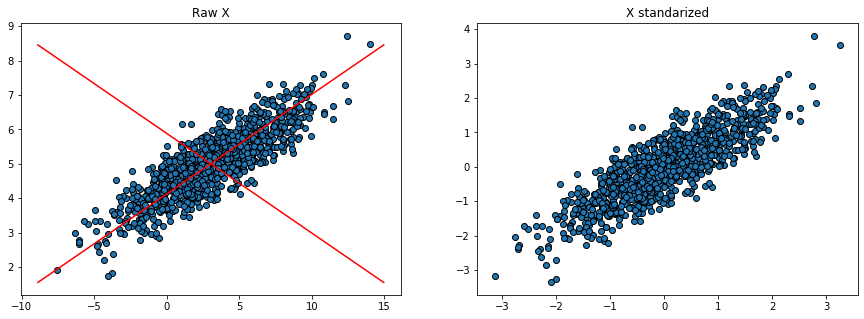

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X[:, 0], X[:, 1], edgecolors='black')
axes[0].plot([a, b], [c, d], c='red')
axes[0].plot([e, f], [g, h], c='red')
axes[0].set_title('Raw X')

axes[1].scatter(X_std[:, 0], X_std[:, 1], edgecolors='black')
axes[1].set_title('X standarized')

Text(0.5, 1.0, 'X PCA')

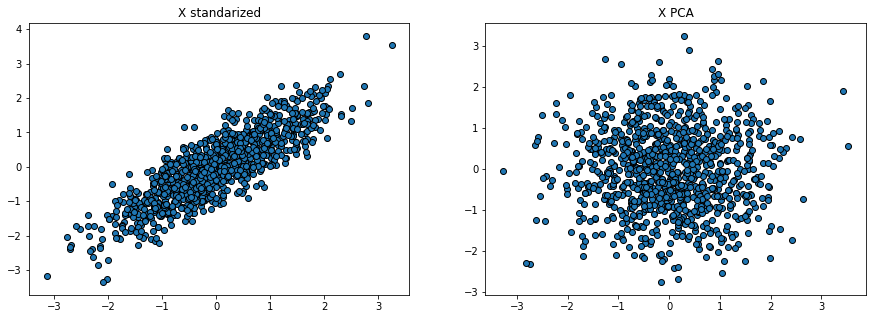

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X_std[:, 0], X_std[:, 1], edgecolors='black')
axes[0].set_title('X standarized')
axes[1].scatter(X_pc[:, 0], X_pc[:, 1], edgecolors='black')
axes[1].set_title('X PCA')